In [1]:
# Import required modules
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
project_root = str(Path.cwd().resolve().parent)
print(f"Project root: {project_root}")

Project root: C:\Users\Nitya Karthik A\ds4cg-job-analytics


In [3]:
# Add project root to sys.path for module imports
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.analysis import efficiency_analysis as ea
from src.visualization import JobsWithMetricsVisualizer, UsersWithMetricsVisualizer

# Automatically reload modules before executing code
# This is useful for development to see changes without restarting the kernel.
%load_ext autoreload
# Reload all modules imported with %aimport every time before executing the Python code typed.
%autoreload 2

In [5]:
# Load the jobs DataFrame from DuckDB
query = f"SELECT * FROM Jobs WHERE map_contains(GPUType, 'a100') OR map_contains(GPUType, 'h100') AND GPUs == 1;"
preprocessed_jobs_df = ea.load_preprocessed_jobs_dataframe_from_duckdb(
    db_path='../data/slurm_data.db',
    table_name='Jobs', query=query
    )
display(preprocessed_jobs_df.head(10))
print(preprocessed_jobs_df.shape)

Connected to ../data/slurm_data.db
[Preprocessing] Running with new database format: GPU types as dictionary.
Disconnected from ../data/slurm_data.db


,JobID,ArrayJobID,ArrayID,JobName,IsArray,Interactive,Account,User,Constraints,QOS,...,GPUComputeUsage,CPUMemUsage,CPUComputeUsage,Queued,vram_constraint,partition_constraint,requested_vram,allocated_vram,user_jobs,account_jobs
0,38482061,<NA>,-1,joby42h-n,False,non-interactive,pi_zhangl_uri_edu,zhangl_uri_edu,['avx512'],long,...,0.0,2.576670e+10,99.143585,3 days 01:23:00,<NA>,<NA>,<NA>,320,639,777
1,38750103,<NA>,-1,interactive,False,shell,pi_rrahimi_umass_edu,kwhitecross_umass_edu,['vram80'],normal,...,400.0,4.025245e+11,18.408882,0 days 00:00:09,320,320,320,320,307,1900
2,38750282,<NA>,-1,bash,False,shell,pi_chuangg_umass_edu,jiabenchen_umass_edu,['a100'],normal,...,0.0,1.701478e+07,0.000080,0 days 00:11:57,40,<NA>,40,80,34,22859
3,38754198,<NA>,-1,sys/dashboard/sys/bc_jupyter,False,bc_jupyter,pi_mshao_umassd_edu,vbandi_umassd_edu,['x86_64'],normal,...,38.0,1.714425e+10,3.148984,0 days 00:00:19,<NA>,80,80,80,83,779
4,38755106,<NA>,-1,interactive,False,shell,pi_hzamani_umass_edu,mrafiee_umass_edu,['vram40'],normal,...,27.0,1.110556e+11,3.993254,0 days 00:00:26,40,80,80,80,64,5661
5,38755853,<NA>,-1,Template_Pendulum.sh,False,non-interactive,pi_gfelder_smith_edu,zji_smith_edu,['gpu:a100'],normal,...,0.0,2.815717e+09,48.104427,0 days 00:00:27,40,<NA>,40,80,54,54
6,38767669,<NA>,-1,bash,False,shell,pi_donghyunkim_umass_edu,soowangyang_umass_edu,['gpu:a100'],normal,...,0.0,1.412309e+09,0.089295,0 days 01:26:40,40,<NA>,40,80,11,131
7,38772272,<NA>,-1,sys/dashboard/sys/bc_vscode,False,bc_vscode,pi_mendres_umass_edu,ppenta_umass_edu,"['vram80', 'gpu:a100']",normal,...,0.0,2.073360e+10,0.742180,0 days 00:00:19,80,<NA>,80,80,41,41
8,38777804,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,...,77.0,3.440394e+08,98.004761,0 days 00:00:28,40,<NA>,40,80,43775,43775
9,38777806,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,...,0.0,3.466895e+08,99.955582,0 days 00:00:09,40,<NA>,40,80,43775,43775


(237560, 33)


In [1]:
efficiency_analysis = ea.EfficiencyAnalysis(
	jobs_df=preprocessed_jobs_df
)

NameError: name 'ea' is not defined

In [8]:
filtered_jobs = efficiency_analysis.filter_jobs_for_analysis(
)
filtered_jobs

,JobID,ArrayJobID,ArrayID,JobName,IsArray,Interactive,Account,User,Constraints,QOS,...,GPUComputeUsage,CPUMemUsage,CPUComputeUsage,Queued,vram_constraint,partition_constraint,requested_vram,allocated_vram,user_jobs,account_jobs
0,38482061,<NA>,-1,joby42h-n,False,non-interactive,pi_zhangl_uri_edu,zhangl_uri_edu,['avx512'],long,...,0.0,2.576670e+10,99.143585,3 days 01:23:00,<NA>,<NA>,<NA>,320,639,777
1,38750103,<NA>,-1,interactive,False,shell,pi_rrahimi_umass_edu,kwhitecross_umass_edu,['vram80'],normal,...,400.0,4.025245e+11,18.408882,0 days 00:00:09,320,320,320,320,307,1900
2,38750282,<NA>,-1,bash,False,shell,pi_chuangg_umass_edu,jiabenchen_umass_edu,['a100'],normal,...,0.0,1.701478e+07,0.000080,0 days 00:11:57,40,<NA>,40,80,34,22859
3,38754198,<NA>,-1,sys/dashboard/sys/bc_jupyter,False,bc_jupyter,pi_mshao_umassd_edu,vbandi_umassd_edu,['x86_64'],normal,...,38.0,1.714425e+10,3.148984,0 days 00:00:19,<NA>,80,80,80,83,779
4,38755106,<NA>,-1,interactive,False,shell,pi_hzamani_umass_edu,mrafiee_umass_edu,['vram40'],normal,...,27.0,1.110556e+11,3.993254,0 days 00:00:26,40,80,80,80,64,5661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306457,40130966,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,...,74.0,2.487665e+08,99.791695,0 days 02:59:10,40,<NA>,40,80,43775,43775
306458,40121643,<NA>,-1,threshold_analysis_MMLU_Pro_s21_PRM72B,False,non-interactive,pi_ebagdasaryan_umass_edu,eaghazadeh_umass_edu,['gpu:a100'],normal,...,179.0,1.520632e+09,12.507521,0 days 00:17:08,160,<NA>,160,320,1392,1377
306460,40130998,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,...,72.0,2.472550e+08,99.813065,0 days 03:11:45,40,<NA>,40,80,43775,43775
306461,40131017,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,...,70.0,2.090107e+08,99.810341,0 days 03:11:23,40,<NA>,40,80,43775,43775


In [ ]:
#Generate All Metrics 

metrics_dict = efficiency_analysis.calculate_all_efficiency_metrics(filtered_jobs)

jobs_with_metrics = metrics_dict['jobs_with_efficiency_metrics']
users_with_metrics = metrics_dict['users_with_efficiency_metrics']
pi_accounts_with_metrics = metrics_dict['pi_accounts_with_efficiency_metrics']

In [10]:
# Set option to display all columns
pd.set_option('display.max_columns', None)
# Display the DataFrame
display(jobs_with_metrics.head(10))
# To revert to default settings (optional)
pd.reset_option('display.max_columns')

print(f"Jobs found: {len(jobs_with_metrics)}")

,JobID,ArrayJobID,ArrayID,JobName,IsArray,Interactive,Account,User,Constraints,QOS,Status,ExitCode,SubmitTime,StartTime,Elapsed,TimeLimit,Partition,NodeList,CPUs,gpu_count,GPUType,GPUMemUsage,GPUComputeUsage,CPUComputeUsage,Queued,vram_constraint,partition_constraint,requested_vram,allocated_vram,user_jobs,account_jobs,job_hours,vram_hours,used_vram_gib,alloc_vram_efficiency,vram_constraint_efficiency,alloc_vram_efficiency_score,vram_constraint_efficiency_score,used_cpu_mem_gib,allocated_cpu_mem_gib,cpu_mem_efficiency
0,38482061,<NA>,-1,joby42h-n,False,non-interactive,pi_zhangl_uri_edu,zhangl_uri_edu,['avx512'],long,COMPLETED,SUCCESS,2025-06-22 18:12:07,2025-06-25 19:35:07,1 days 06:31:27,0 days 00:48:00,gpu,[uri-gpu002],64,4,{'a100': 4},0.000000e+00,0.0,99.143585,3 days 01:23:00,<NA>,<NA>,<NA>,320,639,777,122.096667,39070.933333,0.000000,0.000000,<NA>,-inf,<NA>,23.997108,503.369141,0.047673
1,38750103,<NA>,-1,interactive,False,shell,pi_rrahimi_umass_edu,kwhitecross_umass_edu,['vram80'],normal,TIMEOUT,SUCCESS,2025-06-26 16:21:10,2025-06-26 16:21:19,0 days 08:00:21,0 days 00:08:00,superpod-a100,[gpu015],16,4,{'a100': 4},3.299974e+11,400.0,18.408882,0 days 00:00:09,320,320,320,320,307,1900,32.023333,10247.466667,307.333984,0.960419,0.960419,-413.853600,-413.8536,374.880127,500.000000,0.749760
2,38750282,<NA>,-1,bash,False,shell,pi_chuangg_umass_edu,jiabenchen_umass_edu,['a100'],normal,TIMEOUT,SUCCESS,2025-06-26 16:37:02,2025-06-26 16:48:59,0 days 08:00:11,0 days 00:08:00,gpu,[gpu022],16,1,{'a100': 1},0.000000e+00,0.0,0.000080,0 days 00:11:57,40,<NA>,40,80,34,22859,8.003056,640.244444,0.000000,0.000000,0.0,-inf,-inf,0.015846,40.000000,0.000396
3,38754198,<NA>,-1,sys/dashboard/sys/bc_jupyter,False,bc_jupyter,pi_mshao_umassd_edu,vbandi_umassd_edu,['x86_64'],normal,TIMEOUT,SUCCESS,2025-06-26 17:22:47,2025-06-26 17:23:06,0 days 08:00:05,0 days 00:08:00,umd-cscdr-gpu,[umd-cscdr-gpu002],8,1,{'a100': 1},7.157580e+09,38.0,3.148984,0 days 00:00:19,<NA>,80,80,80,83,779,8.001389,640.111111,6.666016,0.083325,<NA>,-1590.678871,<NA>,15.966827,16.000000,0.997927
4,38755106,<NA>,-1,interactive,False,shell,pi_hzamani_umass_edu,mrafiee_umass_edu,['vram40'],normal,TIMEOUT,SUCCESS,2025-06-26 18:16:35,2025-06-26 18:17:01,0 days 08:00:10,0 days 00:08:00,superpod-a100,[gpu013],8,1,{'a100': 1},1.525049e+10,27.0,3.993254,0 days 00:00:26,40,80,80,80,64,5661,8.002778,640.222222,14.203125,0.177539,0.355078,-1106.665485,-662.897256,103.428574,200.000000,0.517143
5,38755853,<NA>,-1,Template_Pendulum.sh,False,non-interactive,pi_gfelder_smith_edu,zji_smith_edu,['gpu:a100'],normal,COMPLETED,SUCCESS,2025-06-26 18:32:51,2025-06-26 18:33:18,0 days 07:24:47,0 days 00:48:00,gpu-preempt,[uri-gpu003],32,1,{'a100': 1},0.000000e+00,0.0,48.104427,0 days 00:00:27,40,<NA>,40,80,54,54,7.413056,593.044444,0.000000,0.000000,0.0,-inf,-inf,2.622341,78.125000,0.033566
6,38767669,<NA>,-1,bash,False,shell,pi_donghyunkim_umass_edu,soowangyang_umass_edu,['gpu:a100'],normal,TIMEOUT,SUCCESS,2025-06-26 20:58:58,2025-06-26 22:25:38,0 days 02:00:02,0 days 00:02:00,gpu,[gpu022],8,1,{'a100': 1},0.000000e+00,0.0,0.089295,0 days 01:26:40,40,<NA>,40,80,11,131,2.000556,160.044444,0.000000,0.000000,0.0,-inf,-inf,1.315315,120.000000,0.010961
7,38772272,<NA>,-1,sys/dashboard/sys/bc_vscode,False,bc_vscode,pi_mendres_umass_edu,ppenta_umass_edu,"['vram80', 'gpu:a100']",normal,TIMEOUT,SUCCESS,2025-06-26 21:52:38,2025-06-26 21:52:57,0 days 04:00:14,0 days 00:04:00,gpu-preempt,[uri-gpu007],8,1,{'a100': 1},0.000000e+00,0.0,0.742180,0 days 00:00:19,80,<NA>,80,80,41,41,4.003889,320.311111,0.000000,0.000000,0.0,-inf,-inf,19.309669,32.000000,0.603427
8,38777804,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,COMPLETED,SUCCESS,2025-06-26 22:16:01,2025-06-26 22:16:29,0 days 01:44:01,0 days 00:02:00,gpu-preempt,[gpu018],1,1,{'a100': 1},5.054136e+08,77.0,98.004761,0 days 00:00:28,40,<NA>,40,80,43775,43775,1.733611,138.688889,0.470703,0.005884,0.011768,-712.24

Jobs found: 148407



Top inefficient Jobs by VRAM-hours:


,JobID,ArrayJobID,ArrayID,JobName,IsArray,Interactive,Account,User,Constraints,QOS,...,job_hours,vram_hours,used_vram_gib,alloc_vram_efficiency,vram_constraint_efficiency,alloc_vram_efficiency_score,vram_constraint_efficiency_score,used_cpu_mem_gib,allocated_cpu_mem_gib,cpu_mem_efficiency
291327,24374463,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",normal,...,1443.088889,1.847154e+06,5.750000,0.004492,0.008984,-9.984634e+06,-8704284.232043,57.648254,512.0,0.112594
289714,24374463,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",normal,...,1190.653333,1.524036e+06,5.750000,0.004492,0.008984,-8.238049e+06,-7181667.820298,57.735668,512.0,0.112765
16769,37750425,<NA>,-1,train-70M-RVV-dec-300B,False,non-interactive,pi_hadi_amiri_uml_edu,mohamed_elgaar_student_uml_edu,['a100-80g'],normal,...,768.115556,9.831879e+05,54.814453,0.042824,0.042824,-3.097692e+06,-3097692.254144,12.604267,176.0,0.071615
16770,37751772,<NA>,-1,train-70M-RVV-dec-300B,False,non-interactive,pi_hadi_amiri_uml_edu,mohamed_elgaar_student_uml_edu,['a100-80g'],normal,...,768.080000,9.831424e+05,54.638672,0.042686,0.042686,-3.100707e+06,-3100706.711723,12.704948,176.0,0.072187
16225,37749568,<NA>,-1,train-70M-RVV-dec-300B,False,non-interactive,pi_hadi_amiri_uml_edu,mohamed_elgaar_student_uml_edu,['a100-80g'],normal,...,745.924444,9.547833e+05,54.603516,0.042659,0.042659,-3.011880e+06,-3011880.199659,12.703892,176.0,0.072181
147795,28409832,<NA>,-1,qwen_llamafactory,False,non-interactive,pi_miyyer_umass_edu,ctpham_umass_edu,"['a100-80g', 'gpu:a100']",normal,...,1186.037778,7.590642e+05,69.851562,0.109143,0.109143,-1.681400e+06,-1681399.812568,599.966187,600.0,0.999944
296545,24009623,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7543', 'amd7702', ...",normal,...,590.542222,7.558940e+05,5.728516,0.004475,0.008951,-4.088751e+06,-3564805.182063,45.587269,512.0,0.089038
293050,24374462,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",normal,...,1082.040000,6.925056e+05,8.451172,0.013205,0.02641,-2.996585e+06,-2516576.34781,57.801441,512.0,0.112893
31368,36796295,<NA>,-1,train-160M-RVV-asc-300B,False,non-interactive,pi_hadi_amiri_uml_edu,mohamed_elgaar_student_uml_edu,['a100-80g'],normal,...,529.462222,6.777116e+05,36.601562,0.028595,0.028595,-2.408943e+06,-2408942.594071,13.956161,176.0,0.079296
290908,24374463,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",normal,...,512.431111,6.559118e+05,5.750000,0.004492,0.008984,-3.545476e+06,-3090832.501584,57.736538,512.0,0.112767


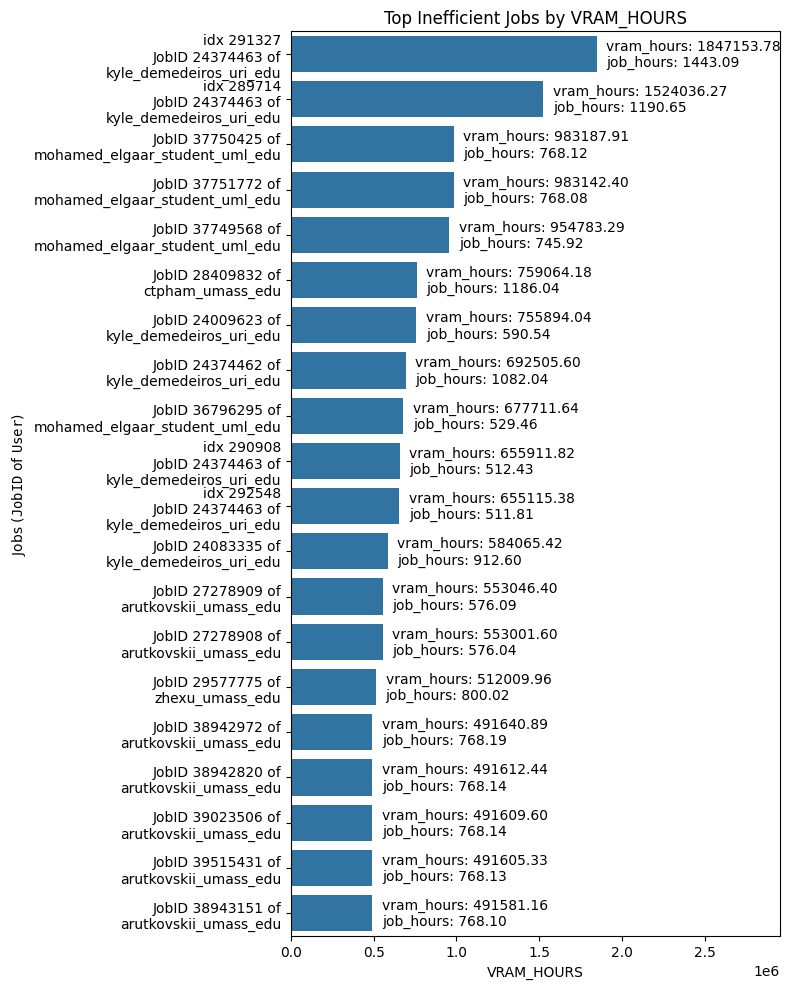

In [12]:
inefficient_jobs_vram_hours = efficiency_analysis.sort_and_filter_records_with_metrics(
    metrics_df_name_enum=ea.MetricsDataFrameNameEnum.JOBS,
    sorting_key="vram_hours",
    ascending=False,  # Sort by vram_hours in descending order
    filter_criteria={
        "vram_hours": {"min": 80 * 24, "inclusive": True},  # VRAM-hours threshold for identifying inefficient jobs
    }
)
# Display top inefficient users by VRAM-hours
print("\nTop inefficient Jobs by VRAM-hours:")
display(inefficient_jobs_vram_hours.head(10))

# Plot top inefficient jobs by VRAM-hours, with VRAM-hours as labels
jobs_with_metrics_visualizer = JobsWithMetricsVisualizer(inefficient_jobs_vram_hours.head(20))
jobs_with_metrics_visualizer.visualize(
    column="vram_hours",
    bar_label_columns=["vram_hours", "job_hours"],
)



In [13]:
users_with_metrics

,User,job_count,user_job_hours,pi_account,avg_alloc_vram_efficiency_score,avg_vram_constraint_efficiency_score,expected_value_alloc_vram_efficiency,expected_value_vram_constraint_efficiency,expected_value_gpu_count,vram_hours
0,aabedeen_umass_edu,26,511.391667,pi_wenlongzhao_umass_edu,-2129.200752,-890.544852,30.751045,61.433142,80.000000,40911.333333
1,aaditya_umass_edu,4,108.006667,pi_dganesan_umass_edu,-2467.757084,-2467.757084,30.484490,30.48449,80.000000,8640.533333
2,aafzali_umass_edu,236,3435.600278,pi_aghasemi_umass_edu,-7245.478038,-4821.904581,27.460351,53.666579,937.398024,830206.688889
3,aagrawal_umass_edu,342,686.606389,pi_jdomke_umass_edu,-41.982876,70.116058,62.227589,124.411043,81.344746,55209.511111
4,aamballa_umass_edu,158,2505.345556,pi_mccallum_umass_edu,-1567.842576,-738.96606,46.408783,88.712459,156.839434,238929.511111
...,...,...,...,...,...,...,...,...,...,...
565,zhoulin-qc-group_umass_edu,24,199.783333,pi_zhoulin_umass_edu,-1549.534996,-1214.431708,1.911885,3.823771,541.224994,34693.244444
566,zibinchen_umass_edu,1,0.791389,pi_lgao_umass_edu,<NA>,<NA>,0.000000,0.0,80.000000,63.311111
567,zji_smith_edu,54,186.476667,pi_gfelder_smith_edu,-973.410428,-824.777555,0.489489,0.978977,80.000000,14918.133333
568,zunzhezhang_umass_edu,90,158.898889,pi_chuangg_umass_edu,-305.064622,-200.437658,16.141937,31.898428,78.586453,12487.300000



Top inefficient users by allocated vram efficiency:


,User,job_count,user_job_hours,pi_account,avg_alloc_vram_efficiency_score,avg_vram_constraint_efficiency_score,expected_value_alloc_vram_efficiency,expected_value_vram_constraint_efficiency,expected_value_gpu_count,vram_hours
57,arup_mazumder_uri_edu,25,408.210278,pi_malvarez_uri_edu,<NA>,<NA>,0.0,<NA>,343.518108,67233.711111
48,anthony_bowers_student_uml_edu,448,3236.678889,pi_subash_sharma_uml_edu,<NA>,<NA>,0.0,<NA>,79.406405,257013.033333
70,aukale_umass_edu,6,14.234444,pi_bnl_umass_edu,<NA>,<NA>,0.0,0.0,80.000000,1138.755556
61,asajeeda_umassd_edu,18,144.062500,pi_mshao_umassd_edu,<NA>,<NA>,0.0,<NA>,80.000000,11525.000000
80,bdahrooge_uri_edu,5,5.016667,pi_bdahrooge_uri_edu,<NA>,<NA>,0.0,<NA>,80.000000,401.333333
83,bmuhwezi_umass_edu,18,50.248611,pi_jtaneja_umass_edu,<NA>,<NA>,0.0,<NA>,75.747588,3806.211111
133,dmohapatra_umass_edu,2163,6793.930278,pi_dmohapatra_umass_edu,<NA>,<NA>,0.0,<NA>,80.350488,544230.988889
174,hemmecl_uri_edu,8,9.085556,pi_hemmecl_uri_edu,<NA>,<NA>,0.0,0.0,80.000000,726.844444
200,jadenugba_uri_edu,6,30.025000,pi_kelum_gajamannage_uri_edu,<NA>,<NA>,0.0,<NA>,80.000000,2402.000000
203,james_kiikka_student_uml_edu,5,33.732778,pi_murat_inalpolat_uml_edu,<NA>,<NA>,0.0,<NA>,320.000000,5397.244444


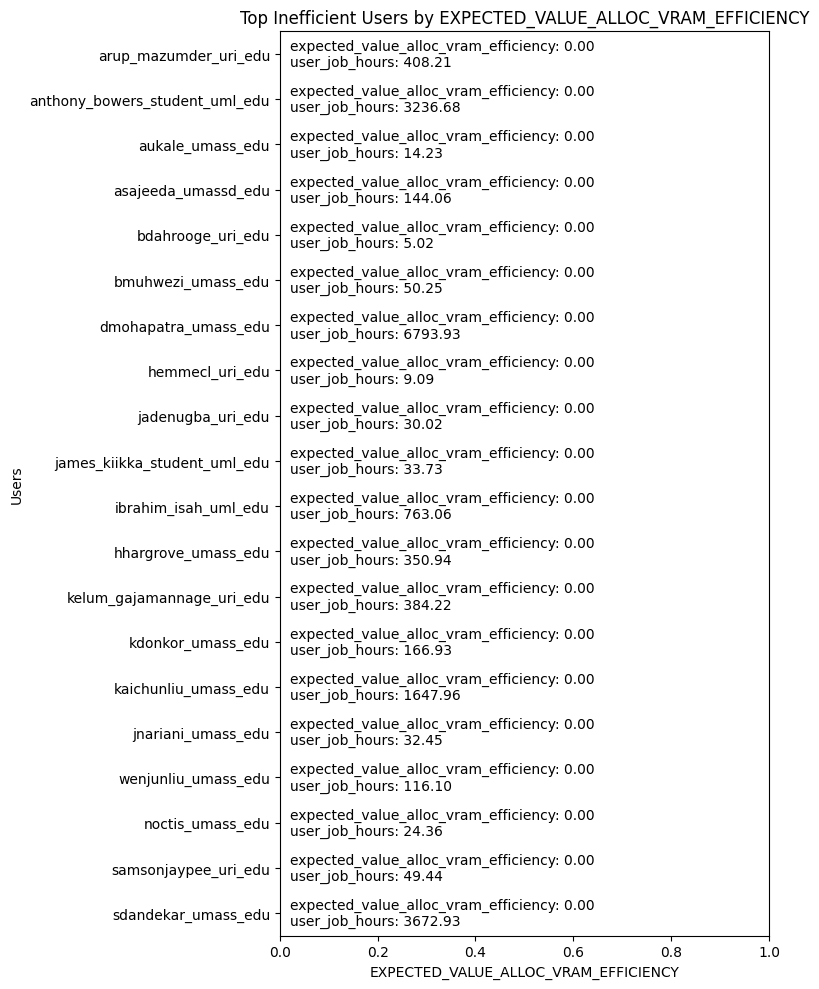

In [14]:
inefficient_users_alloc_vram_eff = efficiency_analysis.sort_and_filter_records_with_metrics(
    metrics_df_name_enum=ea.MetricsDataFrameNameEnum.USERS,
    sorting_key="expected_value_alloc_vram_efficiency",
    ascending=True,  # we want to find users with low efficiency
    filter_criteria={
        "expected_value_alloc_vram_efficiency": {"max": 0.3, "inclusive": True},
        "job_count": {"min": 5, "inclusive": True},  # Minimum number of jobs to consider a user
    }
)
print("\nTop inefficient users by allocated vram efficiency:")
display(inefficient_users_alloc_vram_eff.head(20))

# Plot top inefficient users by allocated vram efficiency, with allocated vram efficiency as labels
users_with_metrics_visualizer = UsersWithMetricsVisualizer(inefficient_users_alloc_vram_eff.head(20))
users_with_metrics_visualizer.visualize(
    column="expected_value_alloc_vram_efficiency",
    bar_label_columns=["expected_value_alloc_vram_efficiency", "user_job_hours"],
    figsize=(8, 10)
)


Top inefficient users by allocated vram efficiency:


,User,job_count,user_job_hours,pi_account,avg_alloc_vram_efficiency_score,avg_vram_constraint_efficiency_score,expected_value_alloc_vram_efficiency,expected_value_vram_constraint_efficiency,expected_value_gpu_count,vram_hours
57,arup_mazumder_uri_edu,25,408.210278,pi_malvarez_uri_edu,<NA>,<NA>,0.0,<NA>,343.518108,67233.711111
48,anthony_bowers_student_uml_edu,448,3236.678889,pi_subash_sharma_uml_edu,<NA>,<NA>,0.0,<NA>,79.406405,257013.033333
70,aukale_umass_edu,6,14.234444,pi_bnl_umass_edu,<NA>,<NA>,0.0,0.0,80.000000,1138.755556
61,asajeeda_umassd_edu,18,144.062500,pi_mshao_umassd_edu,<NA>,<NA>,0.0,<NA>,80.000000,11525.000000
80,bdahrooge_uri_edu,5,5.016667,pi_bdahrooge_uri_edu,<NA>,<NA>,0.0,<NA>,80.000000,401.333333
83,bmuhwezi_umass_edu,18,50.248611,pi_jtaneja_umass_edu,<NA>,<NA>,0.0,<NA>,75.747588,3806.211111
133,dmohapatra_umass_edu,2163,6793.930278,pi_dmohapatra_umass_edu,<NA>,<NA>,0.0,<NA>,80.350488,544230.988889
174,hemmecl_uri_edu,8,9.085556,pi_hemmecl_uri_edu,<NA>,<NA>,0.0,0.0,80.000000,726.844444
200,jadenugba_uri_edu,6,30.025000,pi_kelum_gajamannage_uri_edu,<NA>,<NA>,0.0,<NA>,80.000000,2402.000000
203,james_kiikka_student_uml_edu,5,33.732778,pi_murat_inalpolat_uml_edu,<NA>,<NA>,0.0,<NA>,320.000000,5397.244444


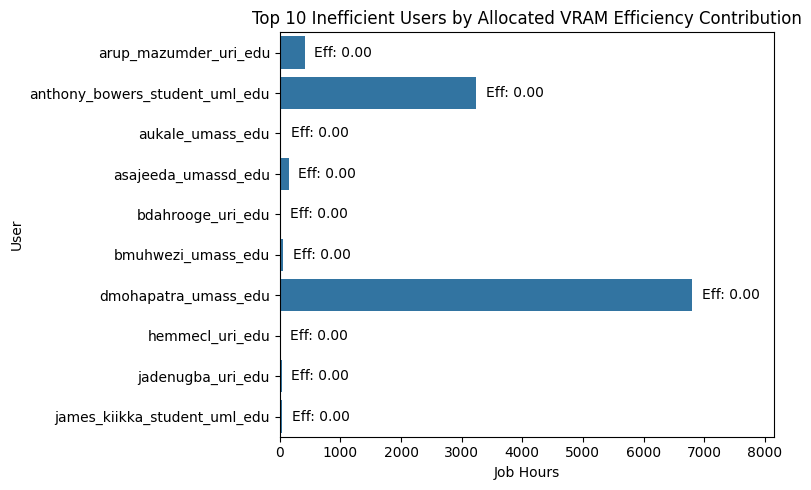

In [15]:
inefficient_users = efficiency_analysis.sort_and_filter_records_with_metrics(
    metrics_df_name_enum=ea.MetricsDataFrameNameEnum.USERS,
    sorting_key="expected_value_alloc_vram_efficiency",
    ascending=True,  # we want to find users with low efficiency
    filter_criteria={
        "expected_value_alloc_vram_efficiency": {"max": 0.3, "inclusive": True},
        "job_count": {"min": 5, "inclusive": True},  # Minimum number of jobs to consider a user
    }
)

# Display top inefficient users by job count
print("\nTop inefficient users by allocated vram efficiency:")
display(inefficient_users.head(10))


# Plot top inefficient users by GPU hours, with efficiency as labels
top_users = inefficient_users.head(10)

plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    y=top_users["User"],
    x=top_users["user_job_hours"],
    orient="h"
)
plt.xlabel("Job Hours")
plt.ylabel("User")
plt.title("Top 10 Inefficient Users by Allocated VRAM Efficiency Contribution")

# Annotate bars with expected_value_alloc_vram_efficiency, keeping text fully inside the plot's right spine
ax = barplot
xmax = top_users["user_job_hours"].max()
# Add headroom for annotation space (20% extra)
xlim = xmax * 1.20 if xmax > 0 else 1
ax.set_xlim(0, xlim)

# Calculate annotation x-position: place at 98% of xlim or just left of the right spine, whichever is smaller
for i, (job_hours, efficiency) in enumerate(
    zip(
        top_users["user_job_hours"],
        top_users["expected_value_alloc_vram_efficiency"],
        strict=True,
    )
):
    # Place annotation at min(job_hours + 2% of xlim, 98% of xlim)
    xpos = min(job_hours + xlim * 0.02, xlim * 0.98)
    # If bar is very close to right spine, nudge annotation left to avoid overlap
    if xpos > xlim * 0.96:
        xpos = xlim * 0.96
    ax.text(
        xpos,
        i,
        f"Eff: {efficiency:.2f}",
        va="center",
        ha="left",
        fontsize=10,
        color="black",
        clip_on=True
    )

plt.tight_layout()
plt.show()


Top inefficient users by VRAM-hours:


,User,job_count,user_job_hours,pi_account,avg_alloc_vram_efficiency_score,avg_vram_constraint_efficiency_score,expected_value_alloc_vram_efficiency,expected_value_vram_constraint_efficiency,expected_value_gpu_count,vram_hours
560,zhangl_uri_edu,634,90287.560000,pi_zhangl_uri_edu,-309651.336488,<NA>,0.825842,<NA>,1862.056827,3.327139e+07
305,mohamed_elgaar_student_uml_edu,369,13808.491667,pi_hadi_amiri_uml_edu,-131265.039066,-131033.895991,42.328785,42.532276,12460.610805,1.301190e+07
256,kyle_demedeiros_uri_edu,21,10944.300000,pi_hendawi_uri_edu,-2082050.394203,-1790801.606127,7.195080,14.390159,9845.526603,8.444675e+06
59,arutkovskii_umass_edu,403,17237.942222,pi_mzink_umass_edu,-51353.601636,-51474.635918,53.631786,53.737931,3385.575428,7.626365e+06
492,tpanambur_umass_edu,103,43435.105556,pi_mparente_umass_edu,-135127.140226,-132806.769778,9.291061,6.966876,648.636293,7.043517e+06
188,hzeng_umass_edu,438,16252.083889,pi_hzamani_umass_edu,-28048.171697,-13780.467421,55.120613,45.689636,1568.509521,5.234342e+06
536,ychittepu_umass_edu,850,14539.787222,pi_sniekum_umass_edu,-9289.388313,<NA>,64.145415,<NA>,1356.965445,4.547837e+06
110,ctpham_umass_edu,4423,13750.524444,pi_miyyer_umass_edu,-2237.617654,-2228.37669,61.361520,62.948928,2182.123517,4.424443e+06
428,sidongzhang_umass_edu,118,6099.595556,pi_mfiterau_umass_edu,-89543.062545,-66656.650328,46.141222,92.282444,5038.964682,3.854313e+06
62,asalemi_umass_edu,2121,13927.749722,pi_hzamani_umass_edu,-3979.931209,-203.626866,64.636368,53.062167,1538.500974,3.652346e+06


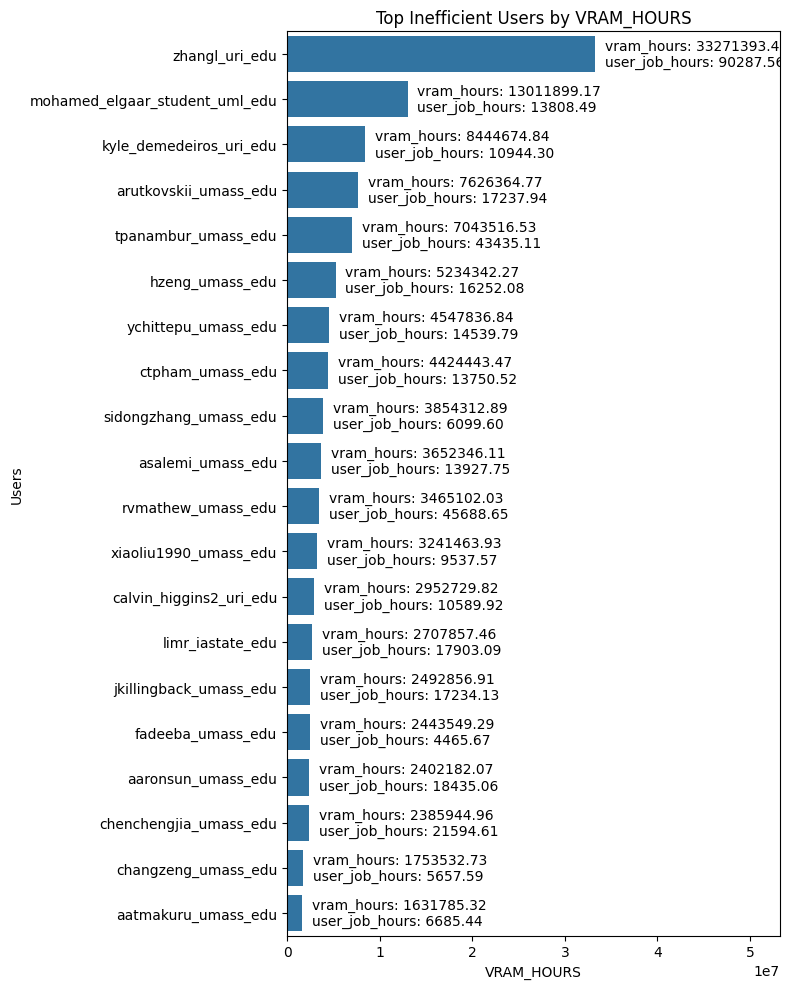

In [16]:
inefficient_users_vram_hours = efficiency_analysis.find_inefficient_users_by_vram_hours(
    vram_hours_filter={"min": 200, "inclusive": True},  # VRAM-hours threshold for identifying inefficient users
    min_jobs=5,  # Minimum number of jobs to consider a user
)
# Display top inefficient users by VRAM-hours
print("\nTop inefficient users by VRAM-hours:")
display(inefficient_users_vram_hours.head(20))


# Plot top inefficient users by VRAM-hours, with VRAM-hours as labels
users_with_metrics_visualizer = UsersWithMetricsVisualizer(inefficient_users_vram_hours.head(20))
users_with_metrics_visualizer.visualize(
    column="vram_hours",
    bar_label_columns=["vram_hours", "user_job_hours"],
    figsize=(8, 10)
)

In [17]:
pi_accounts_with_metrics

,pi_account,job_count,pi_acc_job_hours,user_count,pi_acc_vram_hours,avg_alloc_vram_efficiency_score,avg_vram_constraint_efficiency_score,expected_value_alloc_vram_efficiency,expected_value_vram_constraint_efficiency,expected_value_gpu_count
0,pi_casey_umass_edu,130,717.973611,3,5.706491e+04,-1711.36239,663.002721,16.056336,24.845597,79.490294
1,pi_jaimedavila_umass_edu,118,397.456389,3,3.163591e+04,-990.722375,-580.163087,34.497883,68.840942,79.598911
2,pi_jdutta_umass_edu,157,1389.985556,1,1.098379e+05,-711.994555,188.023768,41.507712,83.015424,79.020885
3,pi_rrahimi_umass_edu,1621,20128.112500,9,4.207390e+06,-3114.621107,-2477.66448,65.431443,103.749536,1087.386452
4,pi_mshao_umassd_edu,709,7154.762222,6,1.060650e+06,-29776.640901,<NA>,13.276330,<NA>,485.610316
...,...,...,...,...,...,...,...,...,...,...
192,pi_tbernard_umass_edu,2,1.233611,1,1.534000e+02,NaN,<NA>,0.000000,0.0,213.051115
193,pi_cmusco_umass_edu,187,1120.048611,1,9.682169e+04,-1051.700432,-763.823766,16.732393,32.29591,122.373220
194,pi_lkomoroske_umass_edu,2,33.862500,1,2.709000e+03,-390.228553,-390.228553,59.976594,59.976594,80.000000
195,pi_dathomas_uri_edu,20,53.396667,1,4.271733e+03,-1030.167376,<NA>,0.442265,<NA>,80.000000



Top inefficient PI Groups by VRAM-hours:


,pi_account,job_count,pi_acc_job_hours,user_count,pi_acc_vram_hours,avg_alloc_vram_efficiency_score,avg_vram_constraint_efficiency_score,expected_value_alloc_vram_efficiency,expected_value_vram_constraint_efficiency,expected_value_gpu_count
176,pi_zhangl_uri_edu,772,93447.088056,3,3.373371e+07,-125965.866586,<NA>,0.821766,<NA>,1847.573179
67,pi_hzamani_umass_edu,4694,64255.054444,13,1.503335e+07,-6135.351591,-5534.363267,52.728317,53.781621,1183.377329
49,pi_hadi_amiri_uml_edu,1050,17347.453333,2,1.329366e+07,-65830.325513,-65572.053801,42.200323,43.164996,12198.196731
112,pi_miyyer_umass_edu,9335,41673.615556,11,1.125498e+07,-2906.448721,-2848.243567,59.071803,68.384092,1504.307793
85,pi_hendawi_uri_edu,26,10963.549722,2,8.455874e+06,-1051184.454195,-904603.578661,7.186032,14.372064,9838.574067
160,pi_mzink_umass_edu,909,20604.787222,3,8.445648e+06,-20612.641675,-21495.132235,50.638435,50.319856,3199.710253
172,pi_mparente_umass_edu,118,43920.450000,2,7.198827e+06,-87457.016838,-81300.719156,9.467186,7.569718,662.257574
167,pi_sniekum_umass_edu,3641,23123.016389,5,5.786054e+06,-2847.818765,-391.109379,51.681703,0.734207,1189.535022
169,pi_mfiterau_umass_edu,2473,15904.728333,14,4.879917e+06,-9631.016838,-7990.33109,45.844805,87.631521,4085.045472
38,pi_gvanhorn_umass_edu,4125,38652.011111,5,4.277425e+06,-1184.553633,-558.215421,40.183637,9.211771,237.724520


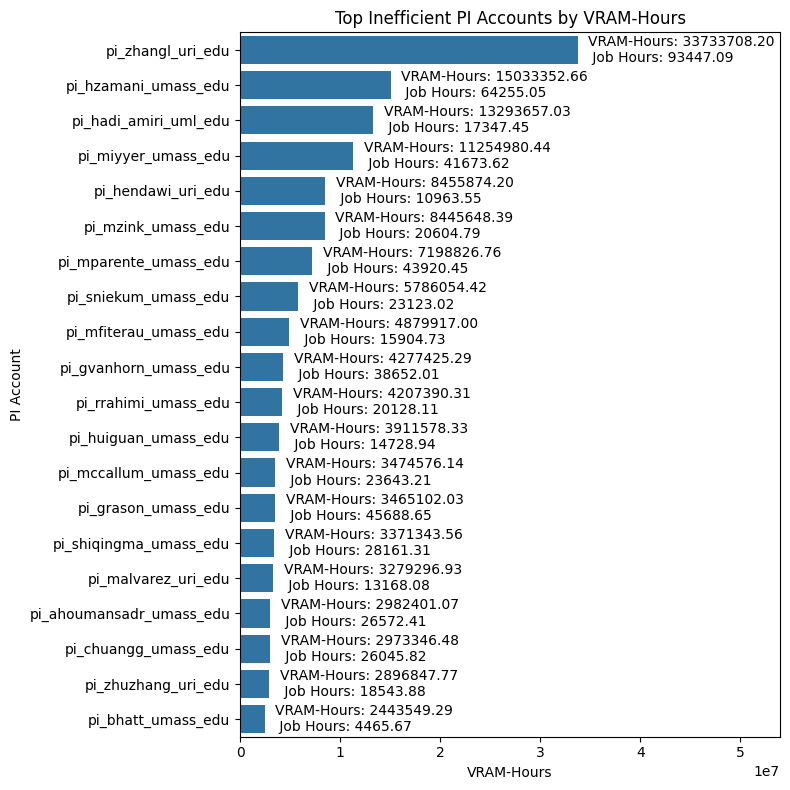

In [18]:
inefficient_pis_vram_hours = efficiency_analysis.sort_and_filter_records_with_metrics(
    metrics_df_name_enum=ea.MetricsDataFrameNameEnum.PI_GROUPS,
    sorting_key="pi_acc_vram_hours",
    ascending=False,
    filter_criteria={
        "pi_acc_vram_hours": {"min": 200, "inclusive": True},  # VRAM-hours threshold for identifying inefficient users
        "job_count": {"min": 5, "inclusive": True},  # Minimum number of jobs to consider a PI account
    }
)
# Display top inefficient users by VRAM-hours
print("\nTop inefficient PI Groups by VRAM-hours:")
display(inefficient_pis_vram_hours.head(20))

top_pi_accounts = inefficient_pis_vram_hours.head(20)

# Plot top inefficient users by VRAM-hours, with VRAM-hours as labels
plt.figure(figsize=(8, 8))
barplot = sns.barplot(
    y=top_pi_accounts["pi_account"],
    x=top_pi_accounts["pi_acc_vram_hours"],
    order=top_pi_accounts["pi_account"].tolist(),  # Only show present values
    orient="h"
)
plt.xlabel("VRAM-Hours")
plt.ylabel("PI Account")
plt.title("Top Inefficient PI Accounts by VRAM-Hours")
# Annotate bars with gpu_hours, keeping text fully inside the plot's right spine
ax = barplot
xmax = top_pi_accounts["pi_acc_vram_hours"].max()
# Add headroom for annotation space (20% extra)
xlim = xmax * 1.6 if xmax > 0 else 1
ax.set_xlim(0, xlim)
# Calculate annotation x-position: place at 98% of xlim or just left of the right spine, whichever is smaller
for i, (vram_hours, pi_acc_job_hours) in enumerate(
    zip(
        top_pi_accounts["pi_acc_vram_hours"],
        top_pi_accounts["pi_acc_job_hours"],
        strict=True,
    )
):
    # Place annotation at min(vram_hours + 2% of xlim, 98% of xlim)
    xpos = min(vram_hours + xlim * 0.02, xlim * 0.98)
    ax.text(
        xpos,
        i,
        f"VRAM-Hours: {vram_hours:.2f}\n Job Hours: {pi_acc_job_hours:.2f}",
        va="center",
        ha="left",
        fontsize=10,
        color="black",
        clip_on=True
    )
plt.tight_layout()
plt.show()

In [19]:
# Filter jobs where no VRAM constraint was set but a GPU was allocated
no_vram_constraint_efficiency_analysis = ea.EfficiencyAnalysis(
	jobs_df=preprocessed_jobs_df
)
all_no_vram_constraint_jobs = no_vram_constraint_efficiency_analysis.filter_jobs_for_analysis(
    vram_constraint_filter={"min": 0, "inclusive": False},  # No VRAM constraints
    gpu_count_filter={"min": 1, "inclusive": True},  # At least one GPU allocated
    gpu_mem_usage_filter={"min": 0, "inclusive": False}  # Used more than 0 GiB of VRAM
)

display(all_no_vram_constraint_jobs.head(10))
print(all_no_vram_constraint_jobs.shape)

,JobID,ArrayJobID,ArrayID,JobName,IsArray,Interactive,Account,User,Constraints,QOS,...,GPUComputeUsage,CPUMemUsage,CPUComputeUsage,Queued,vram_constraint,partition_constraint,requested_vram,allocated_vram,user_jobs,account_jobs
1,38750103,<NA>,-1,interactive,False,shell,pi_rrahimi_umass_edu,kwhitecross_umass_edu,['vram80'],normal,...,400.0,4.025245e+11,18.408882,0 days 00:00:09,320,320,320,320,307,1900
4,38755106,<NA>,-1,interactive,False,shell,pi_hzamani_umass_edu,mrafiee_umass_edu,['vram40'],normal,...,27.0,1.110556e+11,3.993254,0 days 00:00:26,40,80,80,80,64,5661
8,38777804,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,...,77.0,3.440394e+08,98.004761,0 days 00:00:28,40,<NA>,40,80,43775,43775
10,38778439,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,...,74.0,3.487375e+08,99.940666,0 days 00:00:23,40,<NA>,40,40,43775,43775
11,38778453,<NA>,-1,interactive,False,shell,pi_rrahimi_umass_edu,kwhitecross_umass_edu,['vram80'],normal,...,200.0,3.774736e+11,12.098560,0 days 00:00:02,160,160,160,160,307,1900
12,38779093,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,...,75.0,3.485778e+08,99.922623,0 days 00:00:28,40,<NA>,40,40,43775,43775
13,38779171,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,...,76.0,3.461448e+08,99.899124,0 days 00:00:30,40,<NA>,40,40,43775,43775
15,38779276,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,...,76.0,2.885714e+08,99.891739,0 days 00:00:09,40,<NA>,40,40,43775,43775
17,38779546,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,...,73.0,2.495939e+08,99.897453,0 days 00:00:22,40,<NA>,40,40,43775,43775
18,38780091,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,...,73.0,2.485330e+08,99.933105,0 days 00:00:07,40,<NA>,40,40,43775,43775


(112985, 33)


In [20]:
no_vram_constraint_jobs_with_metrics = no_vram_constraint_efficiency_analysis.calculate_job_efficiency_metrics(
    all_no_vram_constraint_jobs
    )

# Set option to display all columns
pd.set_option('display.max_columns', None)
# Display the DataFrame
display(no_vram_constraint_jobs_with_metrics.head(10))
# To revert to default settings (optional)
pd.reset_option('display.max_columns')
print(f"Jobs found: {len(no_vram_constraint_jobs_with_metrics)}")

,JobID,ArrayJobID,ArrayID,JobName,IsArray,Interactive,Account,User,Constraints,QOS,Status,ExitCode,SubmitTime,StartTime,Elapsed,TimeLimit,Partition,NodeList,CPUs,gpu_count,GPUType,GPUMemUsage,GPUComputeUsage,CPUComputeUsage,Queued,vram_constraint,partition_constraint,requested_vram,allocated_vram,user_jobs,account_jobs,job_hours,vram_hours,used_vram_gib,alloc_vram_efficiency,vram_constraint_efficiency,alloc_vram_efficiency_score,vram_constraint_efficiency_score,used_cpu_mem_gib,allocated_cpu_mem_gib,cpu_mem_efficiency
1,38750103,<NA>,-1,interactive,False,shell,pi_rrahimi_umass_edu,kwhitecross_umass_edu,['vram80'],normal,TIMEOUT,SUCCESS,2025-06-26 16:21:10,2025-06-26 16:21:19,0 days 08:00:21,0 days 00:08:00,superpod-a100,[gpu015],16,4,{'a100': 4},3.299974e+11,400.0,18.408882,0 days 00:00:09,320,320,320,320,307,1900,32.023333,10247.466667,307.333984,0.960419,0.960419,-413.853600,-413.8536,374.880127,500.0,0.749760
4,38755106,<NA>,-1,interactive,False,shell,pi_hzamani_umass_edu,mrafiee_umass_edu,['vram40'],normal,TIMEOUT,SUCCESS,2025-06-26 18:16:35,2025-06-26 18:17:01,0 days 08:00:10,0 days 00:08:00,superpod-a100,[gpu013],8,1,{'a100': 1},1.525049e+10,27.0,3.993254,0 days 00:00:26,40,80,80,80,64,5661,8.002778,640.222222,14.203125,0.177539,0.355078,-1106.665485,-662.897256,103.428574,200.0,0.517143
8,38777804,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,COMPLETED,SUCCESS,2025-06-26 22:16:01,2025-06-26 22:16:29,0 days 01:44:01,0 days 00:02:00,gpu-preempt,[gpu018],1,1,{'a100': 1},5.054136e+08,77.0,98.004761,0 days 00:00:28,40,<NA>,40,80,43775,43775,1.733611,138.688889,0.470703,0.005884,0.011768,-712.244323,-616.112511,0.320412,8.0,0.040051
10,38778439,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,COMPLETED,SUCCESS,2025-06-26 22:48:02,2025-06-26 22:48:25,0 days 01:46:21,0 days 00:02:00,gpu-preempt,[ece-gpu001],1,1,{'a100': 1},5.054136e+08,74.0,99.940666,0 days 00:00:23,40,<NA>,40,40,43775,43775,1.772500,70.900000,0.470703,0.011768,0.011768,-314.966667,-314.966667,0.324787,8.0,0.040598
11,38778453,<NA>,-1,interactive,False,shell,pi_rrahimi_umass_edu,kwhitecross_umass_edu,['vram80'],normal,COMPLETED,SUCCESS,2025-06-26 22:54:11,2025-06-26 22:54:13,0 days 02:42:59,0 days 00:08:00,superpod-a100,[gpu018],16,2,{'a100': 2},1.658617e+11,200.0,12.098560,0 days 00:00:02,160,160,160,160,307,1900,5.432778,869.244444,154.470703,0.965442,0.965442,-30.570771,-30.570771,351.549713,500.0,0.703099
12,38779093,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,COMPLETED,SUCCESS,2025-06-26 23:01:42,2025-06-26 23:02:10,0 days 01:43:21,0 days 00:02:00,gpu-preempt,[ece-gpu002],1,1,{'a100': 1},5.054136e+08,75.0,99.922623,0 days 00:00:28,40,<NA>,40,40,43775,43775,1.722500,68.900000,0.470703,0.011768,0.011768,-306.081852,-306.081852,0.324638,8.0,0.040580
13,38779171,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,COMPLETED,SUCCESS,2025-06-26 23:11:47,2025-06-26 23:12:17,0 days 01:38:59,0 days 00:02:00,gpu-preempt,[ece-gpu001],1,1,{'a100': 1},5.054136e+08,76.0,99.899124,0 days 00:00:30,40,<NA>,40,40,43775,43775,1.649722,65.988889,0.470703,0.011768,0.011768,-293.149512,-293.149512,0.322372,8.0,0.040297
15,38779276,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,COMPLETED,SUCCESS,2025-06-26 23:24:17,2025-06-26 23:24:26,0 days 00:46:49,0 days 00:00:59,gpu-preempt,[ece-gpu002],1,1,{'a100': 1},4.970250e+08,76.0,99.891739,0 days 00:00:09,40,<NA>,40,40,43775,43775,0.780278,31.211111,0.462891,0.011572,0.011572,-139.174837,-139.174837,0.268753,8.0,0.033594
17,38779546,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,"['a100', 'v100']",normal,COMPLETED,SUCCESS,2025-06-26 23:36:13,2025-06-26 23:36:35,0 days 00:43:47,0 days 00:00:59,gpu-preempt,[ece-gpu001],1,1,{'a100': 1},4.78150

Jobs found: 112985


In [21]:
# select jobs with specific job id
pd.set_option('display.max_columns', None)
# Display the DataFrame
display(no_vram_constraint_jobs_with_metrics[no_vram_constraint_jobs_with_metrics["JobID"] == 24374463])
pd.reset_option('display.max_columns')

,JobID,ArrayJobID,ArrayID,JobName,IsArray,Interactive,Account,User,Constraints,QOS,Status,ExitCode,SubmitTime,StartTime,Elapsed,TimeLimit,Partition,NodeList,CPUs,gpu_count,GPUType,GPUMemUsage,GPUComputeUsage,CPUComputeUsage,Queued,vram_constraint,partition_constraint,requested_vram,allocated_vram,user_jobs,account_jobs,job_hours,vram_hours,used_vram_gib,alloc_vram_efficiency,vram_constraint_efficiency,alloc_vram_efficiency_score,vram_constraint_efficiency_score,used_cpu_mem_gib,allocated_cpu_mem_gib,cpu_mem_efficiency
289381,24374463,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",normal,PREEMPTED,SUCCESS,2024-09-03 15:33:56,2024-09-04 02:12:01,0 days 02:08:20,0 days 02:48:00,gpu-preempt,"[gpu018, gpu019]",224,16,{'a100': 16},6.174015e+09,99.0,1.398886,0 days 10:38:05,640,<NA>,640,1280,21,34,34.222222,4.380444e+04,5.75,0.004492,0.008984,-2.367812e+05,-206418.295898,57.617062,512.0,0.112533
289714,24374463,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",normal,PREEMPTED,SUCCESS,2024-08-29 20:02:59,2024-08-31 13:08:52,3 days 02:24:57,0 days 02:48:00,gpu-preempt,"[gpu014, gpu018]",224,16,{'a100': 16},6.174015e+09,100.0,1.425578,1 days 17:05:53,640,<NA>,640,1280,21,34,1190.653333,1.524036e+06,5.75,0.004492,0.008984,-8.238049e+06,-7181667.820298,57.735668,512.0,0.112765
290908,24374463,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",normal,PREEMPTED,SUCCESS,2024-08-28 00:04:02,2024-08-28 12:01:14,1 days 08:01:37,0 days 02:48:00,gpu-preempt,"[gpu020, gpu021]",224,16,{'a100': 16},6.174015e+09,100.0,1.419882,0 days 11:57:12,640,<NA>,640,1280,21,34,512.431111,6.559118e+05,5.75,0.004492,0.008984,-3.545476e+06,-3090832.501584,57.736538,512.0,0.112767
291327,24374463,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",normal,PREEMPTED,SUCCESS,2024-08-23 20:50:50,2024-08-24 05:52:24,3 days 18:11:35,0 days 02:48:00,gpu-preempt,"[gpu017, gpu020]",224,16,{'a100': 16},6.174015e+09,100.0,1.419324,0 days 09:01:34,640,<NA>,640,1280,21,34,1443.088889,1.847154e+06,5.75,0.004492,0.008984,-9.984634e+06,-8704284.232043,57.648254,512.0,0.112594
292548,24374463,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",normal,PREEMPTED,SUCCESS,2024-08-21 15:08:27,2024-08-22 12:51:25,1 days 07:59:17,0 days 02:48:00,gpu-preempt,"[gpu020, gpu021]",224,16,{'a100': 16},6.174015e+09,100.0,1.420042,0 days 21:42:58,640,<NA>,640,1280,21,34,511.808889,6.551154e+05,5.75,0.004492,0.008984,-3.541171e+06,-3087079.441659,57.734287,512.0,0.112762
293301,24374463,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",normal,PREEMPTED,SUCCESS,2024-08-20 16:15:30,2024-08-21 10:14:09,0 days 04:54:10,0 days 02:48:00,gpu-preempt,"[gpu020, gpu021]",224,16,{'a100': 16},6.174015e+09,99.0,1.427450,0 days 17:58:39,640,<NA>,640,1280,21,34,78.444444,1.004089e+05,5.75,0.004492,0.008984,-5.427518e+05,-473153.626313,57.712429,512.0,0.112720


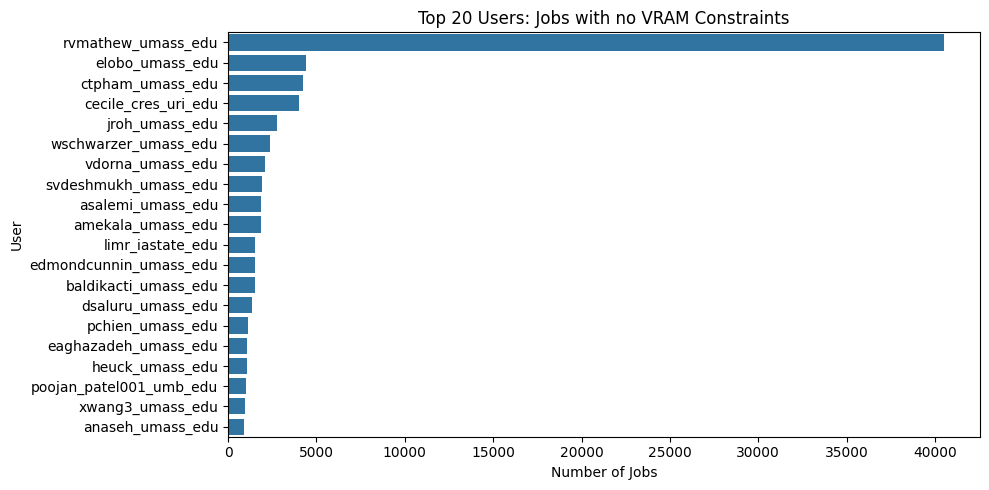

In [22]:
# Plot top users by number of jobs with no VRAM constraints
if not all_no_vram_constraint_jobs.empty:
    plt.figure(figsize=(10, 5))
    user_counts = all_no_vram_constraint_jobs["User"].value_counts().head(20)
    sns.barplot(x=user_counts.values, y=user_counts.index, orient="h")
    plt.xlabel("Number of Jobs")
    plt.ylabel("User")
    plt.title("Top 20 Users: Jobs with no VRAM Constraints")
    plt.tight_layout()
    plt.show()
else:
    print("No jobs found without VRAM constraints.")


Top inefficient Jobs by allocated VRAM efficiency score:


,JobID,ArrayJobID,ArrayID,JobName,IsArray,Interactive,Account,User,Constraints,QOS,...,job_hours,vram_hours,used_vram_gib,alloc_vram_efficiency,vram_constraint_efficiency,alloc_vram_efficiency_score,vram_constraint_efficiency_score,used_cpu_mem_gib,allocated_cpu_mem_gib,cpu_mem_efficiency
291327,24374463,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",normal,...,1443.088889,1.847154e+06,5.750000,0.004492,0.008984,-9.984634e+06,-8704284.232043,57.648254,512.0,0.112594
289714,24374463,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",normal,...,1190.653333,1.524036e+06,5.750000,0.004492,0.008984,-8.238049e+06,-7181667.820298,57.735668,512.0,0.112765
296545,24009623,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7543', 'amd7702', ...",normal,...,590.542222,7.558940e+05,5.728516,0.004475,0.008951,-4.088751e+06,-3564805.182063,45.587269,512.0,0.089038
290908,24374463,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",normal,...,512.431111,6.559118e+05,5.750000,0.004492,0.008984,-3.545476e+06,-3090832.501584,57.736538,512.0,0.112767
292548,24374463,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",normal,...,511.808889,6.551154e+05,5.750000,0.004492,0.008984,-3.541171e+06,-3087079.441659,57.734287,512.0,0.112762
16770,37751772,<NA>,-1,train-70M-RVV-dec-300B,False,non-interactive,pi_hadi_amiri_uml_edu,mohamed_elgaar_student_uml_edu,['a100-80g'],normal,...,768.080000,9.831424e+05,54.638672,0.042686,0.042686,-3.100707e+06,-3100706.711723,12.704948,176.0,0.072187
16769,37750425,<NA>,-1,train-70M-RVV-dec-300B,False,non-interactive,pi_hadi_amiri_uml_edu,mohamed_elgaar_student_uml_edu,['a100-80g'],normal,...,768.115556,9.831879e+05,54.814453,0.042824,0.042824,-3.097692e+06,-3097692.254144,12.604267,176.0,0.071615
16225,37749568,<NA>,-1,train-70M-RVV-dec-300B,False,non-interactive,pi_hadi_amiri_uml_edu,mohamed_elgaar_student_uml_edu,['a100-80g'],normal,...,745.924444,9.547833e+05,54.603516,0.042659,0.042659,-3.011880e+06,-3011880.199659,12.703892,176.0,0.072181
293050,24374462,<NA>,-1,ADISeN,False,non-interactive,pi_hendawi_uri_edu,kyle_demedeiros_uri_edu,"['amd1900x', 'amd7402', 'amd7502', 'amd7543', ...",normal,...,1082.040000,6.925056e+05,8.451172,0.013205,0.02641,-2.996585e+06,-2516576.34781,57.801441,512.0,0.112893
16536,37752650,<NA>,-1,train-70M-RVV-dec-300B,False,non-interactive,pi_hadi_amiri_uml_edu,mohamed_elgaar_student_uml_edu,['a100-80g'],normal,...,338.093333,4.327595e+05,1.947266,0.001521,0.001521,-2.807825e+06,-2807825.303014,4.486153,176.0,0.025490


Minimum value for alloc_vram_efficiency_score: -9984633.665170714


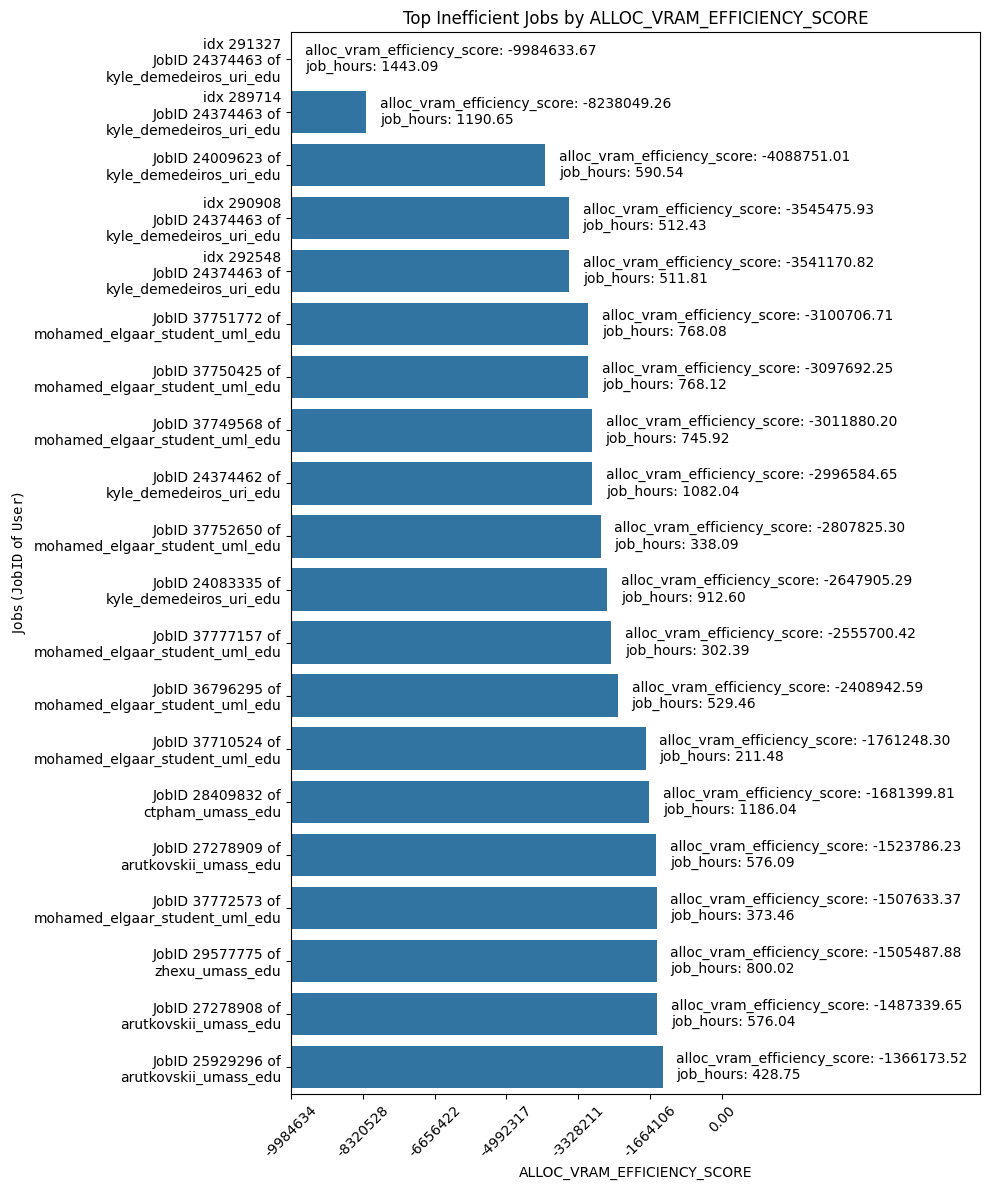

In [23]:
low_alloc_vram_score_jobs = no_vram_constraint_efficiency_analysis.sort_and_filter_records_with_metrics(
    metrics_df_name_enum=ea.MetricsDataFrameNameEnum.JOBS,
    sorting_key="alloc_vram_efficiency_score",
    ascending=True,  # Sort by alloc_vram_efficiency_score in ascending order
    filter_criteria={
        "alloc_vram_efficiency_score": {"max": -10, "inclusive": True},  # score threshold
    }
)
# Display top inefficient users by alloc_vram_efficiency_score
print("\nTop inefficient Jobs by allocated VRAM efficiency score:")

display(low_alloc_vram_score_jobs.head(20))

jobs_with_metrics_visualizer = JobsWithMetricsVisualizer(low_alloc_vram_score_jobs.head(20))
jobs_with_metrics_visualizer.visualize(
    column="alloc_vram_efficiency_score",
    bar_label_columns=["alloc_vram_efficiency_score", "job_hours"],
    figsize=(10, 12)
)

In [24]:
efficiency_analysis.compare_job_metrics_by_gpu_type()

c:\Users\Nitya Karthik A\anaconda3\envs\duckdb\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,A100,H100,L40S,A40,RTX_8000,V100
Mean Used GPU Memory (GiB),17.201086,23.612871,15.308789,14.592507,11.920573,0.0
Median Used GPU Memory (GiB),1.433594,6.951172,14.483398,5.158203,0.000000,0.0
Mean Requested VRAM Efficiency,0.343544,0.577145,0.128362,0.144738,0.223511,<NA>
Median Requested VRAM Efficiency,0.037024,0.346313,0.132782,0.062634,0.223511,<NA>
Mean Allocated VRAM Efficiency,0.195782,0.294564,0.133127,0.166261,0.064786,0.0
Median Allocated VRAM Efficiency,0.017920,0.086890,0.082292,0.046122,0.000000,0.0
Total GPU Hours,881896.701667,8414.887500,61.071111,214.556667,11.031111,3.21
Mean Weighted VRAM Efficiency,0.218726,0.308970,0.156660,0.110912,0.183081,0.0
Median Weighted VRAM Efficiency,0.011647,0.096909,0.067183,0.006944,0.000000,0.0
